In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
# example text for model training (SMS messages)
simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']

In [10]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

# learn the 'vocabulary' of the training data (occurs in-place)
vect.fit(simple_train)

# examine the fitted vocabulary
vect.get_feature_names_out()

array(['cab', 'call', 'me', 'please', 'tonight', 'you'], dtype=object)

In [11]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [12]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [16]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [17]:
# check the type of the document-term matrix
print(type(simple_train_dtm))

# examine the sparse matrix contents
print(simple_train_dtm)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [18]:
# example text for model testing
simple_test = ["please don't call me"]

In [19]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [20]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [29]:
from google.colab import files
spam = files.upload()

Saving spam1 to spam1 (1)


In [33]:
sms = pd.read_csv('spam1', sep='\t')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns= ['label', 'message']


sms.head()

,label,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [34]:
sms.describe()

,label,message
count,5571,5571
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4824,30


In [36]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4824   4515                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [37]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,message,label_num
0,ham,Ok lar... Joking wif u oni...,0
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
2,ham,U dun say so early hor... U c already then say...,0
3,ham,"Nah I don't think he goes to usf, he lives aro...",0
4,spam,FreeMsg Hey there darling it's been 3 week's n...,1


In [38]:
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,Ok lar... Joking wif u oni...,0,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
2,ham,U dun say so early hor... U c already then say...,0,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,1,147


Text(0.5, 0, 'Message Length')

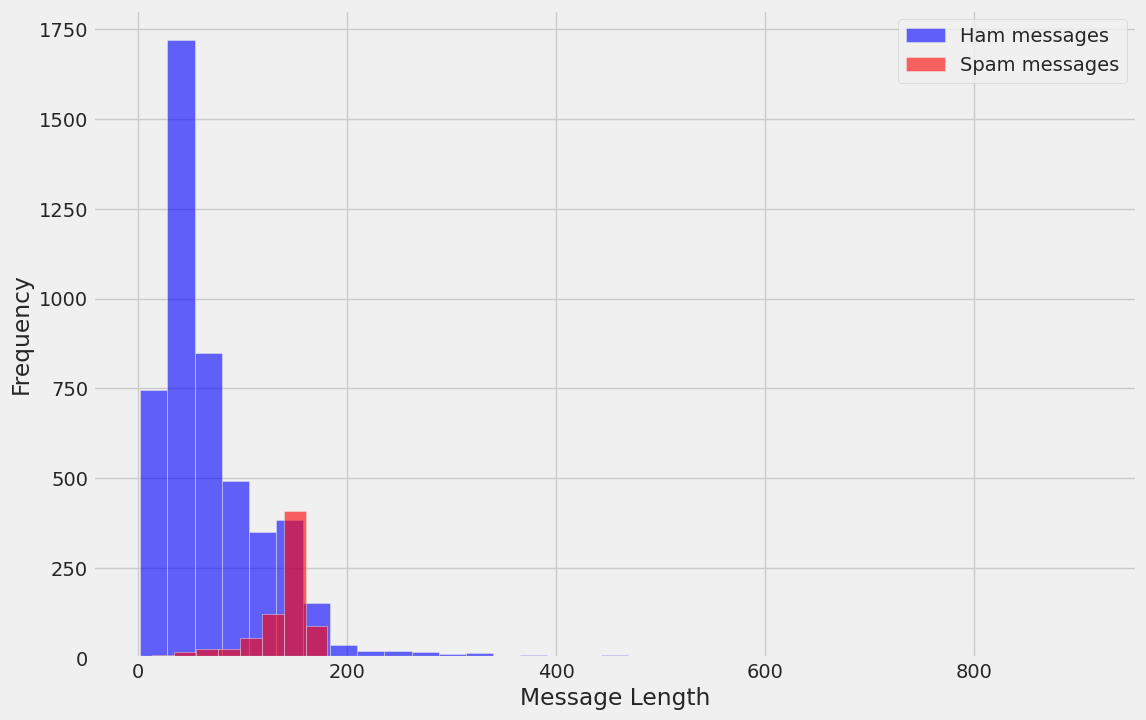

In [39]:
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue',
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red',
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [40]:
sms[sms.label=='ham'].describe()

,label_num,message_len
count,4824.0,4824.000000
mean,0.0,71.474295
std,0.0,58.443940
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,93.000000
max,0.0,910.000000


In [41]:
sms[sms.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.670683
std,0.0,28.873603
min,1.0,13.000000
25%,1.0,133.000000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,223.000000


In [42]:
sms[sms.message_len == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [52]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
sms.head()

,label,message,label_num,message_len
0,ham,Ok lar... Joking wif u oni...,0,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
2,ham,U dun say so early hor... U c already then say...,0,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,1,147


In [54]:
sms['clean_msg'] = sms.message.apply(text_process)

sms.head()

,label,message,label_num,message_len,clean_msg
0,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
2,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
3,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though
4,spam,FreeMsg Hey there darling it's been 3 week's n...,1,147,FreeMsg Hey darling 3 weeks word back Id like ...


In [55]:
type(stopwords.words('english'))

list

In [56]:
from collections import Counter

words = sms[sms.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 273), ('go', 249), ('ill', 238), ('know', 232), ('like', 231), ('got', 231), ('call', 231), ('come', 227), ('good', 224), ('love', 190), ('time', 189), ('day', 188), ('going', 167), ('want', 164), ('one', 163), ('home', 160), ('lor', 160), ('need', 157), ('sorry', 153), ('still', 147), ('see', 138), ('n', 136), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 127), ('today', 125), ('send', 123), ('tell', 121), ('cant', 119), ('hi', 117), ('take', 112), ('oh', 112), ('much', 112), ('night', 109), ('happy', 106), ('hey', 106), ('way', 100), ('hope', 100), ('great', 99), ('pls', 98), ('work', 97), ('thats', 95), ('give', 94), ('dear', 94), ('wat', 94)]


In [57]:
words = sms[sms.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)

print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('stop', 115), ('claim', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 68), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('16', 51), ('guaranteed', 50), ('customer', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('box', 33), ('every', 33), ('message', 32), ('po', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('£2000', 31), ('go', 31), ('number', 30), ('apply', 29), ('code', 29)]


In [58]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.clean_msg
y = sms.label_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5571,)
(5571,)
(4178,)
(1393,)
(4178,)
(1393,)


In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)


# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4178, 7969)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 7969)


In [60]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4178x7969 sparse matrix of type '<class 'numpy.float64'>'
	with 34782 stored elements in Compressed Sparse Row format>

In [61]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [62]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 5.21 ms, sys: 0 ns, total: 5.21 ms
Wall time: 8.32 ms


MultinomialNB()

In [63]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred_class)

=======Accuracy Score===========
0.9820531227566404
=======Confision Matrix===========


array([[1197,    9],
       [  16,  171]])

In [64]:
# print message text for false positives (ham incorrectly classifier)
# X_test[(y_pred_class==1) & (y_test==0)]
X_test[y_pred_class > y_test]

386                                   Customer place call
2430                                       txting driving
3414                                    pic Please resend
4556                                 Gettin rdy ship comp
5474                       Dhoni luck win big titleso win
1289    HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
2161                   replying boye changed phone number
2418    Madamregret disturbancemight receive reference...
494                                      free nowcan call
Name: clean_msg, dtype: object

In [65]:
# print message text for false negatives (spam incorrectly classifier)
X_test[y_pred_class < y_test]

3573    wont believe true Incredible Txts Reply G lear...
67               hear new Divorce Barbie comes Kens stuff
3741                                         22 146tf150p
1457    CLAIRE havin borin time alone wanna cum 2nite ...
1892    CALL 09090900040 LISTEN EXTREME DIRTY LIVE CHA...
2429    Guess IThis first time created web page WWWASJ...
3529    Xmas New Years Eve tickets sale club day 10am ...
190     unique enough Find 30th August wwwareyouunique...
1021    Guess Somebody know secretly fancies Wanna fin...
4068    TBSPERSOLVO chasing us since Sept for£38 defin...
2820    INTERFLORA Its late order Interflora flowers ...
5036    wont believe true Incredible Txts Reply G lear...
2246    Hi ya babe x 4goten bout scammers getting smar...
4513                     Money wining number 946 wot next
4474    Want explicit SEX 30 secs Ring 02073162414 Cos...
1960    Guess Somebody know secretly fancies Wanna fin...
Name: clean_msg, dtype: object

In [71]:
# example of false negative
X_test[4513]

'Money wining number 946 wot next'

In [72]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([5.70493464e-06, 2.98597253e-05, 1.00000000e+00, ...,
       4.47354042e-09, 1.77125945e-06, 5.55621739e-16])

In [73]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9776119402985074

In [74]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred)

=======Accuracy Score===========
0.9641062455132807
=======Confision Matrix===========


array([[1206,    0],
       [  50,  137]])

In [75]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

CPU times: user 20.7 ms, sys: 0 ns, total: 20.7 ms
Wall time: 35.8 ms


LogisticRegression(solver='liblinear')

In [76]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.01393219, 0.01152773, 0.98943989, ..., 0.00250619, 0.0059652 ,
       0.00374377])

In [77]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_prob))

=======Accuracy Score===========
0.9763101220387652
=======Confision Matrix===========
[[1206    0]
 [  33  154]]
=======ROC AUC Score===========
0.9860767463928131


In [78]:
# show default parameters for CountVectorizer
vect

CountVectorizer()

In [79]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

In [80]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

In [81]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

In [82]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)